<a href="https://colab.research.google.com/github/strz/ITWILL_Citrus-Tea/blob/master/cnn_final_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<파이썬 CNN을 이용한 쯔쯔가무시 등 5종 병변 분류 및 예측>**

2020.02.14 (금) <br>
5개 class를 cnn으로 분류하여 알아맞히기
 - 각 클래스당 이미지를 5,000장 부풀려 클래스당 비율을 맞춤.<br>
 (xy5_cnn_final_3_save.npy: 5,000장 (128,128) 사용)

 - 이미지 제너레이터는 보통수준으로 함(많이 변형하지 않았음).
 - 이미지 파일크기가 250KB 보다 큰 경우, 픽셀 256 비율에 맞게 축소하고,
   작은 경우, 픽셀 128 비율에 맞게 축소하여 부풀림.
   이미지에 노이즈를 즐여줌.
 - cnn 모델은 conv2D 4개층으로 함.


**1. 버전 설정 및 확인**

In [1]:
# Tensorflow 사용버전 설정
%tensorflow_version 1.x

# Tensorflow 버전과 GPU 사용 여부 확인
import tensorflow as tf

print(tf.__version__)
print(tf.test.gpu_device_name()) 

1.15.0
/device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**2. 클래스 및 모듈 import**

In [3]:
# 모듈 import
import os
import glob
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense, Dropout
from keras.callbacks import EarlyStopping , ModelCheckpoint
from keras.engine.saving import load_model
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


**3. 함수 정의**

In [0]:
# mj03_2_img_generating_upgrade.py 파일 참고

**4. dataset 불러오기 & 전처리**

(생략된 부분)

In [0]:
# 디렉토리 내의 파일 개수 알아보기
# main_dir = './img_class/'
# categories = ["df", "mel", "nv", "tsu", "vl"]   # 육안으로 보았을 때 쯔쯔가무시와 비슷해보이는 5개 클래스를 선정
# number_of_files = number_of_files(main_dir=main_dir, categories=categories)
# print(number_of_files)

# k = 5000   # 부풀릴 이미지 목표 장수
# n = [k/i for i in number_of_files]
# print(f'폴더별로 곱할 수: {n}')


# # 원본 이미지 불러와 부풀리기
# categories = ["df"]
# img_generating_2(main_dir=main_dir, categories=categories, n=0.9)
# categories = ["mel"]
# img_generating_2(main_dir=main_dir, categories=categories, n=0.9)
# categories = ["nv"]
# img_generating_2(main_dir=main_dir, categories=categories, n=0.9)
# categories = ["tsu"]
# img_generating_2(main_dir=main_dir, categories=categories, n=0.75)
# categories = ["vl"]
# img_generating_2(main_dir=main_dir, categories=categories, n=0.9)


# # X 데이터셋 만들기 (class별로 나누어져 있는 폴더에서 이미지를 가져와 픽셀 배열로 저장)
# X = img_to_dataset(main_dir=main_dir, categories=categories, size=(128,128))
# print(X.shape)   # (22861, 128, 128, 3)

# # 폴더 안에있는 이미지에 y label 붙여 array로 저장
# y = labeling(main_dir=main_dir, categories=categories)

# # train, test 데이터로 나누고, 데이터 정규화 하기
# np.random.seed(214)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(len(X_train), len(X_test), len(y_train), len(y_test))

# xy = (X_train, X_test, y_train, y_test)
# np.save('./xy5_cnn_final_3_save.npy', xy)   # x_save.npy

In [7]:
### np.save로 저장된 파일 불러오기
X_train, X_test, y_train, y_test = np.load('./drive/My Drive/final_project/xy5_cnn_final_3_save.npy', allow_pickle=True)
# xy5_cnn_final_3_save.npy: 5,000장씩 (128,128)

# 정규화 시키기
X_train = X_train.astype('float16') / 255
X_test = X_test.astype('float16') / 255

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')  # X_train: (18288, 128, 128, 3), y_train: (18288, 5)
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')  # X_test: (4573, 128, 128, 3), y_test: (4573, 5)

print(f'X_train: {X_train[0]}, X_test: {X_test[0]}')

X_train: (18288, 128, 128, 3), y_train: (18288, 5)
X_test: (4573, 128, 128, 3), y_test: (4573, 5)
X_train: [[[0.996  0.949  0.996 ]
  [0.992  0.9453 0.992 ]
  [0.9883 0.9414 0.9883]
  ...
  [1.     0.965  0.996 ]
  [1.     0.965  1.    ]
  [1.     0.9688 1.    ]]

 [[0.996  0.949  0.996 ]
  [0.996  0.949  0.996 ]
  [0.996  0.949  0.996 ]
  ...
  [1.     0.965  0.996 ]
  [1.     0.965  1.    ]
  [1.     0.9688 1.    ]]

 [[0.996  0.949  0.996 ]
  [0.996  0.949  0.996 ]
  [0.996  0.949  0.996 ]
  ...
  [1.     0.965  0.996 ]
  [1.     0.965  1.    ]
  [1.     0.9688 1.    ]]

 ...

 [[1.     0.957  0.996 ]
  [1.     0.953  0.992 ]
  [0.996  0.9453 0.9844]
  ...
  [1.     0.961  0.992 ]
  [1.     0.961  0.992 ]
  [1.     0.957  0.9883]]

 [[1.     0.957  0.996 ]
  [1.     0.953  0.992 ]
  [0.996  0.9453 0.9844]
  ...
  [1.     0.961  0.992 ]
  [1.     0.961  0.992 ]
  [1.     0.957  0.9883]]

 [[1.     0.957  0.996 ]
  [1.     0.953  0.992 ]
  [0.996  0.9453 0.9844]
  ...
  [1.     0.961 

**5. 신경망 생성**

In [8]:
### CNN 모델 만들기 ###
# 신경망 모델 생성 - Sequential 클래스 인스턴스 생성
model = Sequential()

In [9]:
# 신경망 모델에 은닉층, 출력층 계층(layers)들을 추가
# (Conv2D -> MaxPool2D) x 4개층 -> Flatten -> Dense -> Dense
# Conv2D 활성화 함수: ReLU
# Dense 활성화 함수: ReLU, Softmax
conv_1 = model.add(Conv2D(filters=32,         # 필터 갯수
                          kernel_size=(3,3),  # 필터의 height/width
                          activation='relu',  # 활성화 함수
                          input_shape=(128, 128, 3),
                          padding='same'))  # 입력데이터의 shape (h,w,c)순서임.
poo1_1 = model.add(MaxPool2D(pool_size=2))   # 이미지가 줄어듦.
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,
                  kernel_size=(3,3),
                  activation='relu',
                  padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,
                  kernel_size=(3,3),
                  activation='relu',
                  padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,
                  kernel_size=(3,3),
                  activation='relu',
                  padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())  # keras에서는 Dense 층에 넣기 전에 모두 펴줘야함.
model.add(Dense(128, activation='relu'))   # 완전 연결 은닉층
model.add(Dense(len(categories), activation='softmax'))  # 출력층 (위에서 함수로 one-hot-encoding 해줌)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# 신경망 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# 신경망 모델의 성능 향상이 없는 경우 중간에 epoch을 빨리 중지시키기 위해서
early_stop = EarlyStopping(monitor='val_loss',
                            verbose=1,
                            patience=10)

# 신경망 학습
model_dir = "./model"
if not os.path.exists(model_dir):  # model_dir이 없을 경우 폴더 생성
    os.mkdir(model_dir)

model_path = model_dir + '/cnn_final_2.model'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train,
                    batch_size=100,  # 전체갯수를 batch_size로 나눈 만큼 반복
                    epochs=50,   # 에폭만큼 파라미터 업데이트
                    verbose=1,
                    callbacks=[checkpoint, early_stop],
                    validation_split=0.2)

Train on 14630 samples, validate on 3658 samples
Epoch 1/50
14630/14630 [==============================] - 11s 756us/step - loss: 1.3072 - acc: 0.4301 - val_loss: 1.2314 - val_acc: 0.4472

Epoch 00001: val_loss improved from inf to 1.23144, saving model to ./model/cnn_final_2.model
Epoch 2/50
14630/14630 [==============================] - 11s 720us/step - loss: 0.9262 - acc: 0.6349 - val_loss: 0.9149 - val_acc: 0.6621

Epoch 00002: val_loss improved from 1.23144 to 0.91490, saving model to ./model/cnn_final_2.model
Epoch 3/50
14630/14630 [==============================] - 11s 725us/step - loss: 0.7944 - acc: 0.6854 - val_loss: 0.9274 - val_acc: 0.6085

Epoch 00003: val_loss did not improve from 0.91490
Epoch 4/50
14630/14630 [==============================] - 11s 722us/step - loss: 0.7381 - acc: 0.7100 - val_loss: 0.7629 - val_acc: 0.7075

Epoch 00004: val_loss improved from 0.91490 to 0.76294, saving model to ./model/cnn_final_2.model
Epoch 5/50
14630/14630 [==========================

**6. 신경망 학습 및 평가**

In [13]:
# 테스트 데이터를 사용해서 신경망 모델을 평가
# 테스트 데이터의 Loss, Accuracy
eval = model.evaluate(X_test, y_test)
print(f'Test loss: {eval[0]}, accuracy: {eval[1]}')
#  - loss: 0.2129 - acc: 0.9160 - val_loss: 0.3984 - val_acc: 0.8472
# Test loss: 0.4026741720564955, accuracy: 0.8569866610047803
# => 정확가 낮고, 오버피팅도 있는 편.


4573/4573 [==============================] - 3s 638us/step
Test loss: 0.4026741720564955, accuracy: 0.8569866610047803


**7. 학습, 손실 그래프 시각화**

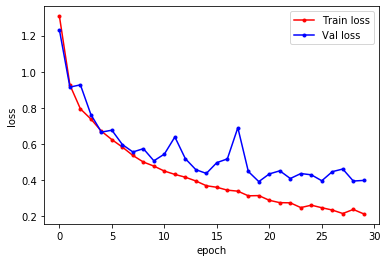

In [14]:
# 학습 데이터와 테스트 데이터의 Loss 그래프
train_loss = history.history['loss']  
val_loss = history.history['val_loss']

x = range(len(train_loss))
plt.plot(x, train_loss, marker='.', color='red', label='Train loss')
plt.plot(x, val_loss, marker='.', color='blue', label='Val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

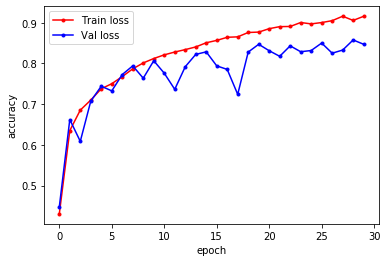

In [16]:
# 학습 데이터, 테스트 데이터의 정확도 그래프
train_accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

x = range(len(train_accuracy))
plt.plot(x, train_accuracy, marker='.', color='red', label='Train loss')
plt.plot(x, val_accuracy, marker='.', color='blue', label='Val loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**8. confusion matrix**

In [17]:
# 저장한 학습모델 불러옴.
# model = load_model('./model/cnn_final_3.model')

categories = ["df", "mel", "nv", "tsu", "vl"] 

# confusion matrix & classification report
print(y_test)
y_true = np.argmax(y_test, axis=1)   # 행 중 가장 큰값의 idx
# (one-hot-encoding 되어있으므로 1로 표시된 값을 행에서 가장 큰값으로 출력하여 array로 만듦)
print(y_true)
y_pred = np.argmax(model.predict(X_test), axis=1)
print(y_pred)

cm = confusion_matrix(y_true, y_pred)
print(cm)
# 세로가 실제클래스, 가로가 예측클래스

report = classification_report(y_true, y_pred, target_names=categories)
print(report)


[[0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]
[2 0 4 ... 0 2 2]
[2 0 4 ... 0 2 2]
[[ 738   27   35   29    3]
 [  33  697  144   54    2]
 [  92  143  652   20    6]
 [   5   18    8 1003   10]
 [   7    1    1   16  829]]
              precision    recall  f1-score   support

          df       0.84      0.89      0.86       832
         mel       0.79      0.75      0.77       930
          nv       0.78      0.71      0.74       913
         tsu       0.89      0.96      0.93      1044
          vl       0.98      0.97      0.97       854

    accuracy                           0.86      4573
   macro avg       0.86      0.86      0.86      4573
weighted avg       0.85      0.86      0.86      4573

